In [25]:
# Importa csv a pandas
import pandas as pd
import os
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Lee el archivo CSV sepsis_data.csv
DATA_DIR = Path("../data/raw")
FILE_A = DATA_DIR / "all_patients_setA.parquet"
FILE_B = DATA_DIR / "all_patients_setB.parquet"

assert FILE_A.exists(), f"No se encontró {FILE_A.resolve()}"
assert FILE_B.exists(), f"No se encontró {FILE_B.resolve()}"

df_a = pd.read_parquet(FILE_A, columns=None)
df_b = pd.read_parquet(FILE_B, columns=None)
data = pd.concat([df_a, df_b], ignore_index=True)
data.head()

,patient_id,AST,Age,Alkalinephos,BUN,BaseExcess,Bilirubin_direct,Bilirubin_total,Calcium,Chloride,...,SBP,SaO2,SepsisLabel,Temp,TroponinI,Unit1,Unit2,WBC,pH,subHR
0,p000001,NaN,83.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,p000001,NaN,83.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,98.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,p000001,NaN,83.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,122.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,p000001,NaN,83.14,NaN,NaN,24.0,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,7.36,NaN
4,p000001,NaN,83.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,122.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


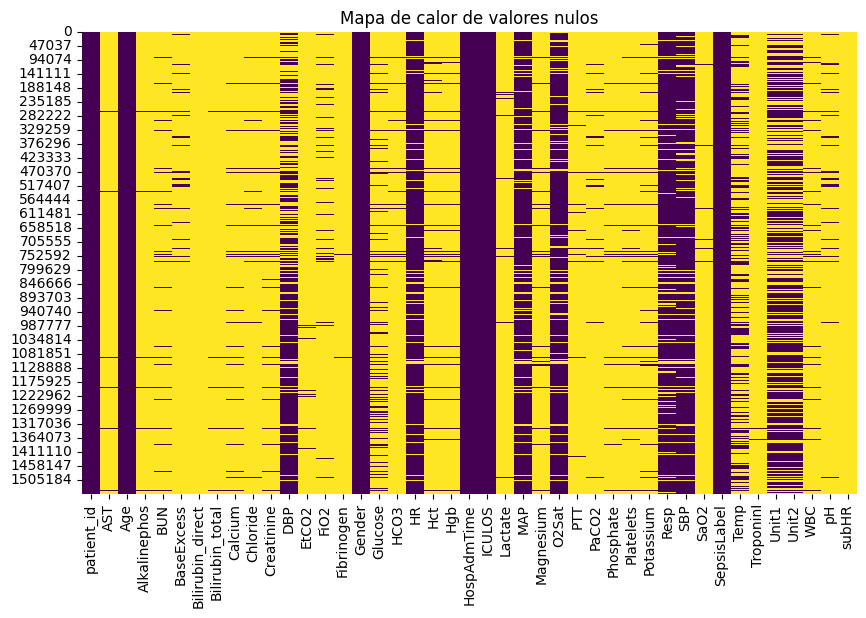

In [3]:
# Grafica la distribucion de valores nulos en cada columna
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Mapa de calor de valores nulos')
plt.show()

In [16]:
# Crea el nuevo DataFrame con las columnas seleccionadas
selected_columns = [
    'patient_id', 'SepsisLabel', 'ICULOS', 'Temp', 'Alkalinephos', 'BaseExcess', 'Creatinine',
    'Bilirubin_direct', 'Bilirubin_total', 'DBP',  'FiO2',  'Gender', 'Glucose',
    'HCO3', 'HR',  'HospAdmTime', 'Lactate', 'Magnesium', 'O2Sat', 'Resp', 'SaO2', 'TroponinI', 'Age', 'MAP'
]

data_selected = data[selected_columns]

In [17]:
# Muestra las primeras filas y la información del nuevo DataFrame
data_selected.head()

,patient_id,SepsisLabel,ICULOS,Temp,Alkalinephos,BaseExcess,Creatinine,Bilirubin_direct,Bilirubin_total,DBP,...,HR,HospAdmTime,Lactate,Magnesium,O2Sat,Resp,SaO2,TroponinI,Age,MAP
0,p000001,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-0.03,NaN,NaN,NaN,NaN,NaN,NaN,83.14,NaN
1,p000001,0.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,97.0,-0.03,NaN,NaN,95.0,19.0,NaN,NaN,83.14,75.33
2,p000001,0.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,89.0,-0.03,NaN,NaN,99.0,22.0,NaN,NaN,83.14,86.00
3,p000001,0.0,4.0,NaN,NaN,24.0,NaN,NaN,NaN,NaN,...,90.0,-0.03,NaN,NaN,95.0,30.0,NaN,NaN,83.14,NaN
4,p000001,0.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,103.0,-0.03,NaN,NaN,88.5,24.5,NaN,NaN,83.14,91.33


In [18]:
data_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1552210 entries, 0 to 1552209
Data columns (total 24 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   patient_id        1552210 non-null  object 
 1   SepsisLabel       1552210 non-null  float64
 2   ICULOS            1552210 non-null  float64
 3   Temp              525226 non-null   float64
 4   Alkalinephos      24941 non-null    float64
 5   BaseExcess        84145 non-null    float64
 6   Creatinine        94616 non-null    float64
 7   Bilirubin_direct  2990 non-null     float64
 8   Bilirubin_total   23141 non-null    float64
 9   DBP               1065656 non-null  float64
 10  FiO2              129365 non-null   float64
 11  Gender            1552210 non-null  float64
 12  Glucose           265516 non-null   float64
 13  HCO3              65028 non-null    float64
 14  HR                1398786 non-null  float64
 15  HospAdmTime       1552202 non-null  float64
 16  

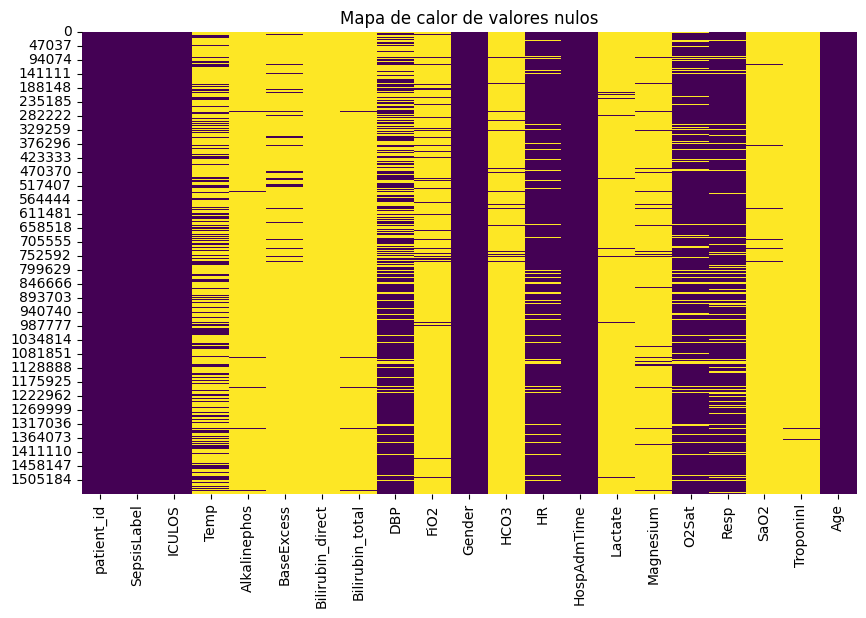

In [7]:
# Grafica la distribucion de valores nulos en cada columna
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.heatmap(data_selected.isnull(), cbar=False, cmap='viridis')
plt.title('Mapa de calor de valores nulos')
plt.show()

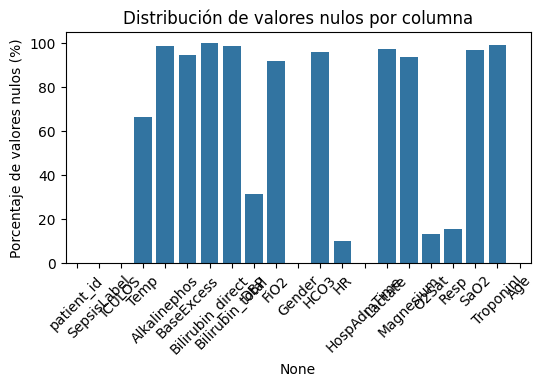

In [8]:
# Grafica la distribucion porcentual de valores nulos en cada columna
null_percentage = data_selected.isnull().mean() * 100
plt.figure(figsize=(6, 3))
sns.barplot(x=null_percentage.index, y=null_percentage.values)
plt.ylabel('Porcentaje de valores nulos (%)')
plt.xticks(rotation=45)
plt.title('Distribución de valores nulos por columna')
plt.show()

In [ ]:
data_selected.columns

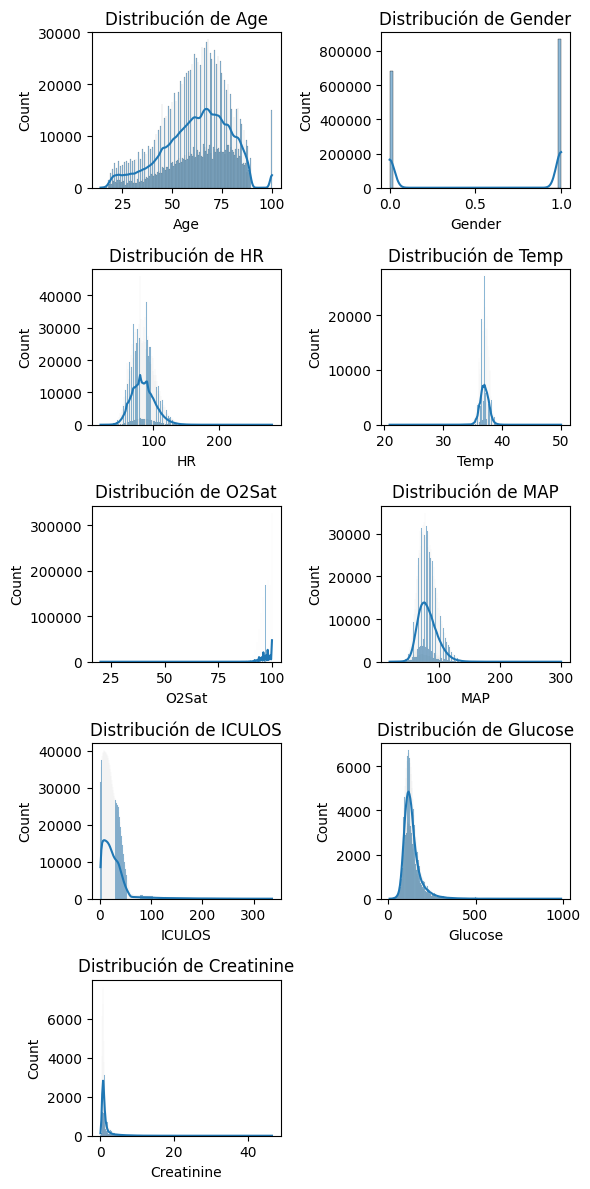

In [19]:
# Grafica los histogramas de las variables numéricas
numeric_columns = ['Age', 'Gender', 'HR', 'Temp', 'O2Sat', 'MAP', 'ICULOS',
       'Glucose', 'Creatinine']
plt.figure(figsize=(6, 12))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(5, 2, i)
    sns.histplot(data_selected[col].dropna(), kde=True)
    plt.title(f'Distribución de {col}')
plt.tight_layout()
plt.show()

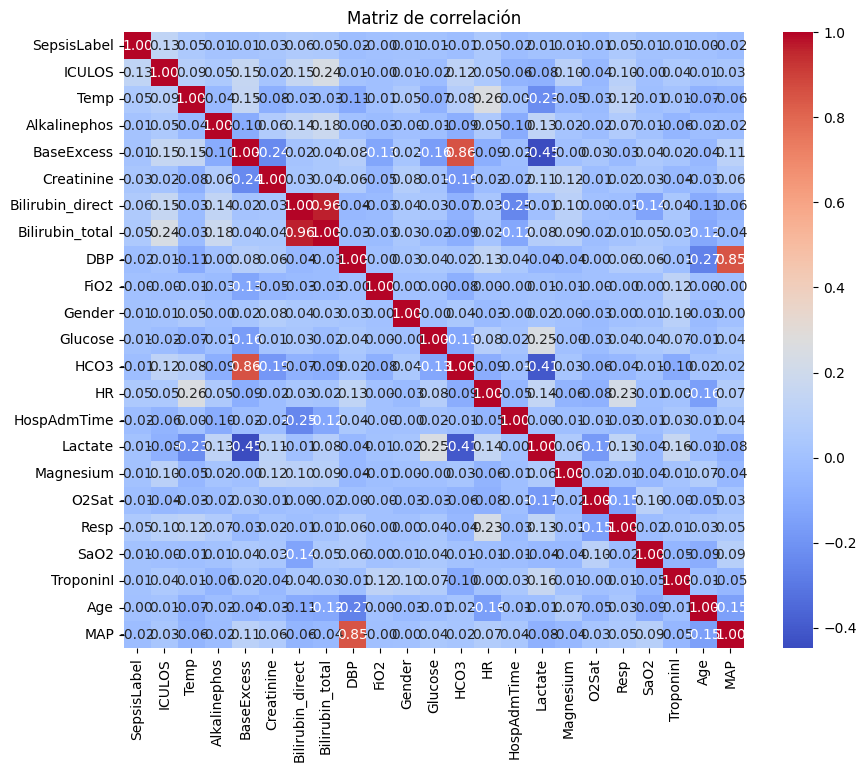

In [22]:
# Grfica la correlacion entre variables numericas
plt.figure(figsize=(10, 8))
X_df = data_selected.drop(columns=['patient_id'], errors="ignore")
correlation_matrix = X_df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()

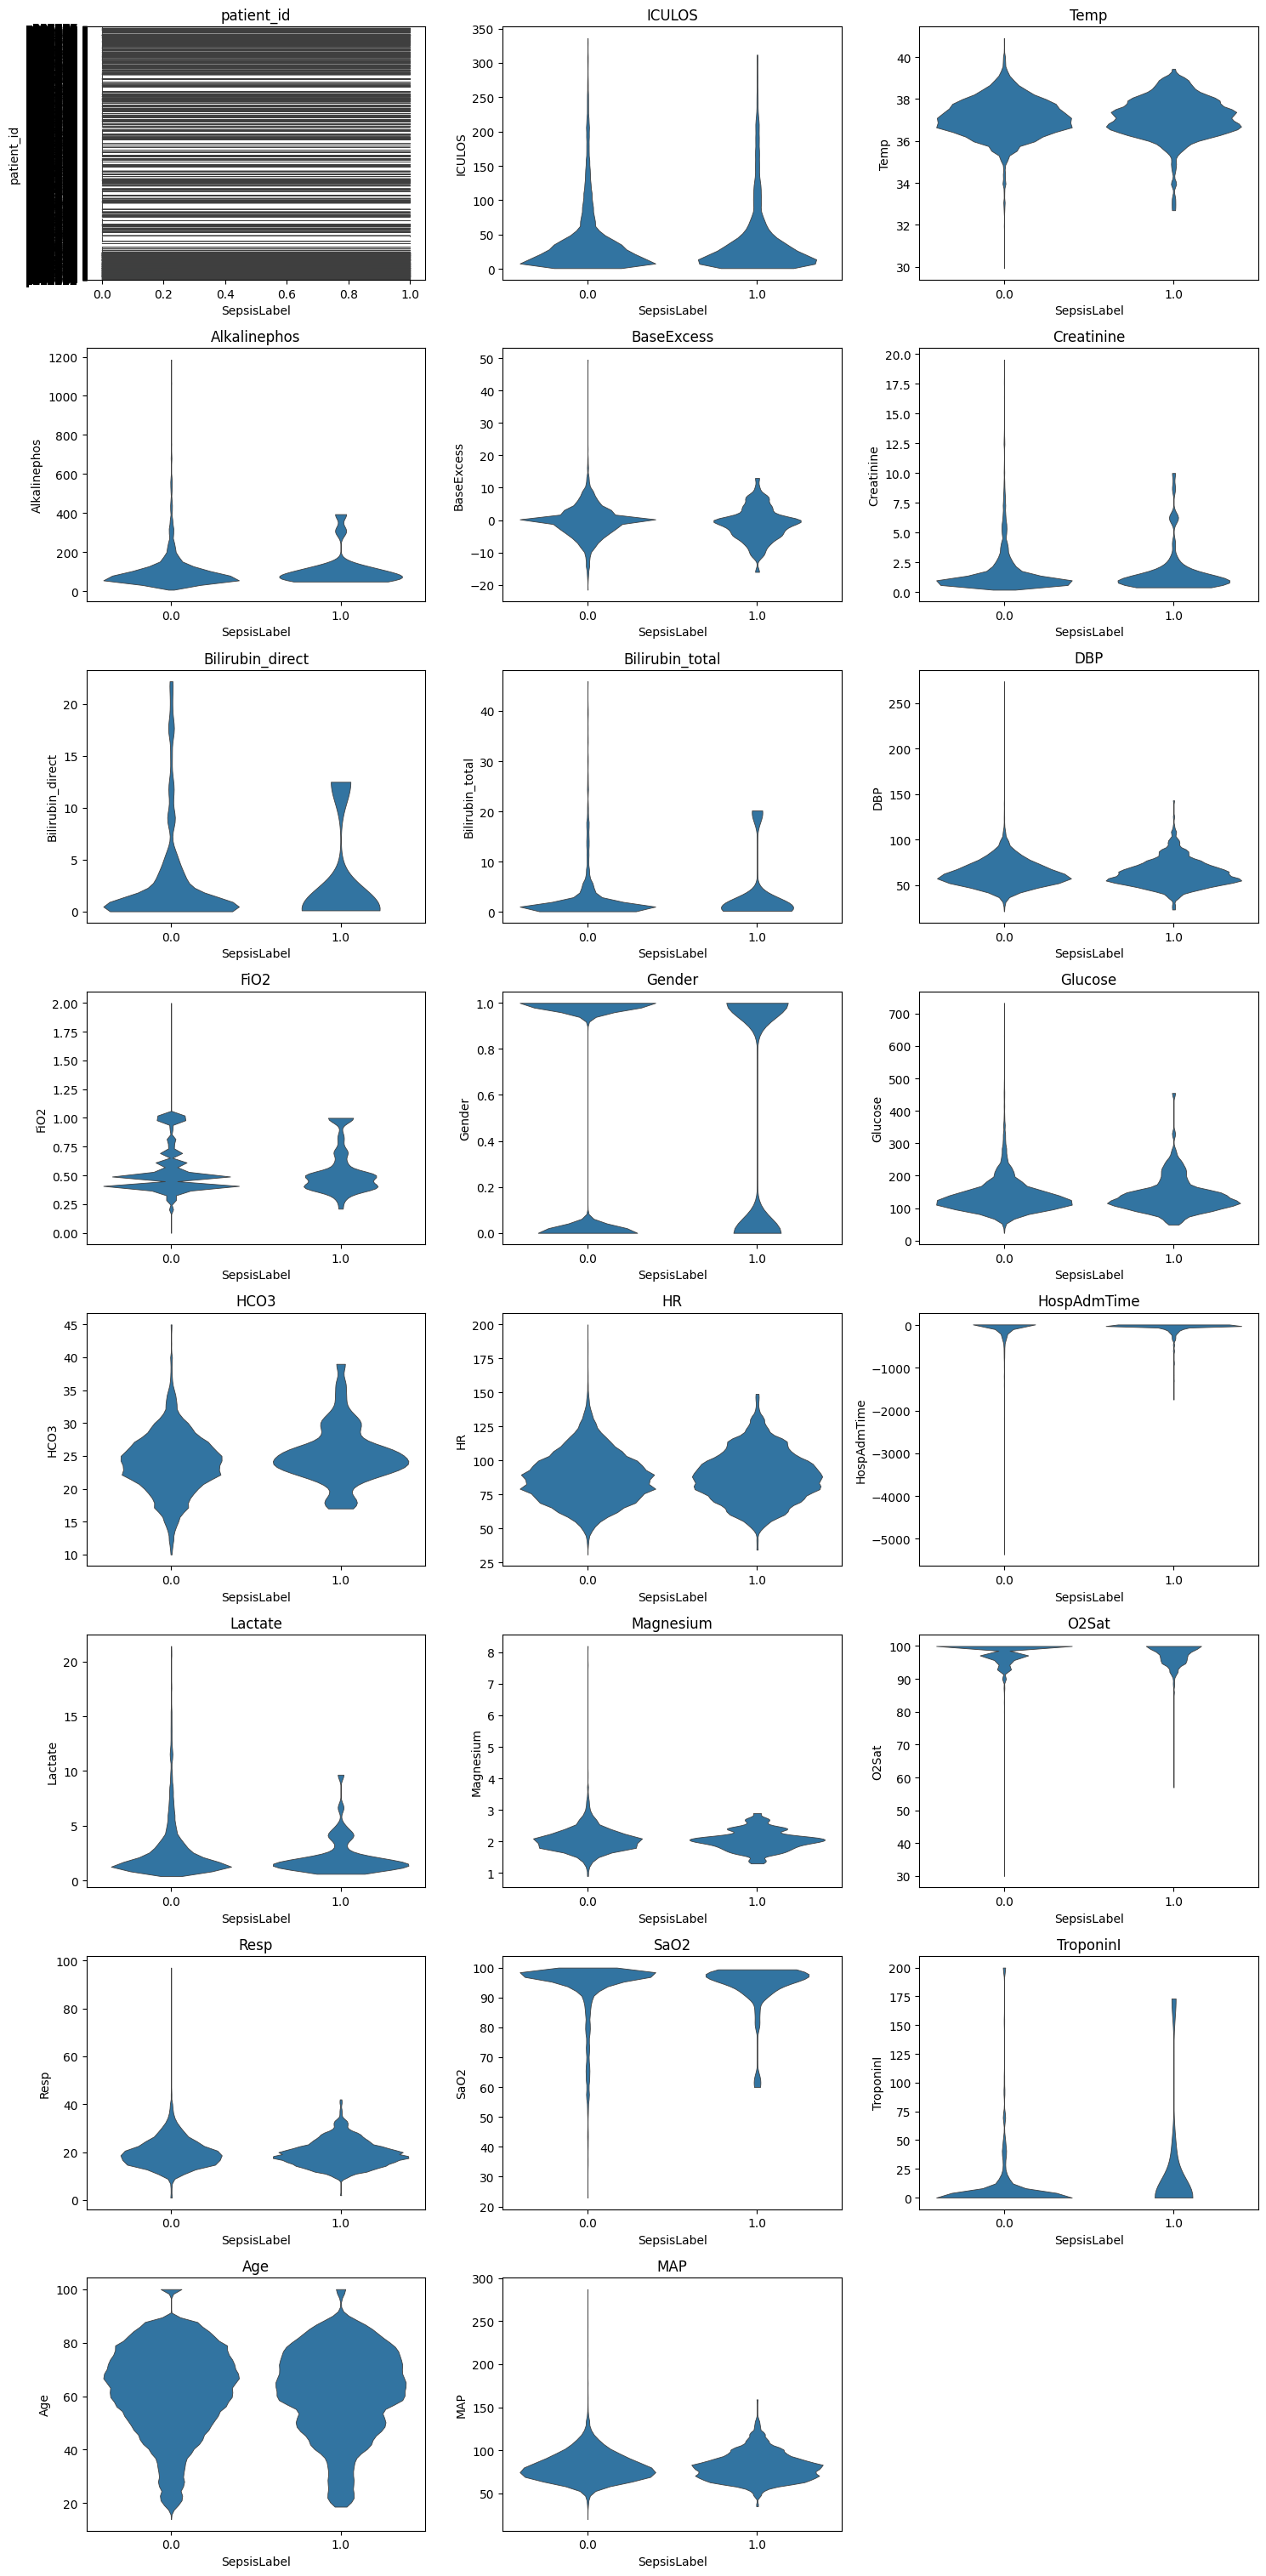

In [58]:
pd.options.mode.copy_on_write = True

y_col = "SepsisLabel"

def stratified_cap(df, y_col, cap_per_class=20_000, seed=42):    
    out = (
        df.groupby(y_col, group_keys=False)
          .apply(lambda g: g.sample(n=min(len(g), cap_per_class), random_state=seed),
                 include_groups=False)
          .reset_index(drop=True)
    )
    if y_col not in out.columns:
        out[y_col] = df[y_col].loc[out.index].values
    
    return out

def plot_features(df, feats, y_col=y_col, per_page=24, cols=3):
    feats = [f for f in feats if f in df.columns and f != y_col]
    for start in range(0, len(feats), per_page):
        page = feats[start:start+per_page]
        rows = int(np.ceil(len(page)/cols))
        plt.figure(figsize=(5*cols, 3.8*rows))
        for i, feat in enumerate(page, 1):
            ax = plt.subplot(rows, cols, i)
            sns.violinplot(
                data=df[[feat, y_col]],
                x=y_col, y=feat,
                cut=0, bw_adjust=0.5, gridsize=50, inner=None, linewidth=0.6
            )
            ax.set_title(feat)
            ax.set_xlabel(y_col); ax.set_ylabel(feat)
        plt.tight_layout()
        plt.show()

df_fast = stratified_cap(data_selected, y_col, cap_per_class=20_000, seed=42)
top_feats = [c for c in data_selected.columns if c != y_col][:100]  
plot_features(df_fast, top_feats, per_page=24, cols=3)

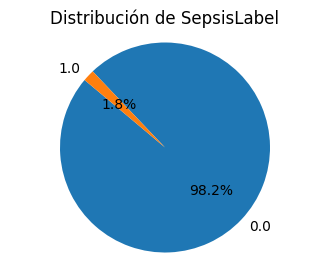

In [45]:
# Grafica la distribución de la variable objetivo 'SepsisLabel' con pie chart incluyedo tabla de frecuencias
sepsis_counts = data_selected['SepsisLabel'].value_counts()
plt.figure(figsize=(4, 3))
plt.pie(sepsis_counts, labels=sepsis_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribución de SepsisLabel')
plt.axis('equal')
plt.show()

In [46]:
# Conteo de clases en la variable objetivo y proporcion
sepsis_counts= data_selected['SepsisLabel'].value_counts()
sepsis_counts, sepsis_proportion = sepsis_counts, sepsis_counts / len(data_selected)
print(sepsis_counts)
print(sepsis_proportion)

SepsisLabel
0.0    1524294
1.0      27916
Name: count, dtype: int64
SepsisLabel
0.0    0.982015
1.0    0.017985
Name: count, dtype: float64
